In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

Number of actions: 3529450


<Axes: ylabel='Frequency'>

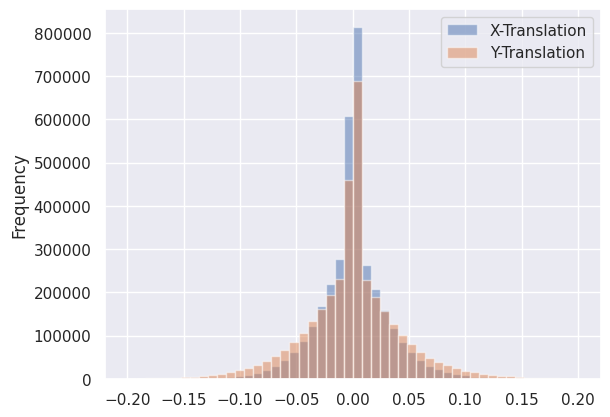

In [2]:
df = pd.read_csv("csv/actions.csv", header=0, names=["X-Translation", "Y-Translation"], delimiter=" ")
print(f"Number of actions: {len(df)}")
df.plot.hist(bins=50, alpha=0.5, range=[-0.2,0.2])
# plt.savefig("action_dist.svg", bbox_inches="tight")

In [3]:
df.describe()

,X-Translation,Y-Translation
count,3.529450e+06,3.529450e+06
mean,1.718155e-04,-5.747184e-04
std,3.028779e-02,4.248353e-02
min,-2.198996e-01,-2.347823e-01
25%,-1.315916e-02,-1.986500e-02
50%,0.000000e+00,0.000000e+00
75%,1.257578e-02,1.829603e-02
max,2.320783e-01,2.449680e-01


<Axes: ylabel='Frequency'>

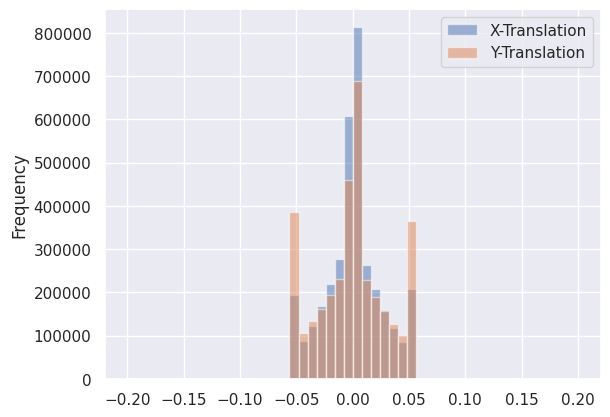

In [4]:
max_value = 0.05
min_value = -max_value

df = df.map(lambda x: max_value if x > max_value else x )
df = df.map(lambda x: min_value if x < min_value else x )
df.plot.hist(bins=50, alpha=0.5, range=[-0.2,0.2])

In [5]:
df.value_counts()

X-Translation  Y-Translation
 0.000000e+00   0.000000e+00    221306
 5.000000e-02   5.000000e-02     30511
-5.000000e-02  -5.000000e-02     24788
 5.000000e-02  -5.000000e-02     24526
-5.000000e-02   5.000000e-02     22900
                                 ...  
-2.516151e-03  -1.555309e-07         1
-2.516180e-03   3.100656e-02         1
-2.516210e-03  -2.238041e-02         1
-2.516359e-03   5.000000e-02         1
-6.556511e-07  -2.234250e-02         1
Name: count, Length: 2223765, dtype: int64

In [6]:
import json
with open("data/language_table/captions.json", "r", encoding="utf-8") as f:
    d = json.load(f)
    episodes = d["episodes"]
    print(f"Number of episodes: {len(episodes)}")
    num_instructions = sum([len(e["captions"]) for e in episodes])
    print(f"Total number of instructions: {num_instructions}")
    train = [e for e in episodes if e["subset"]=="train"]
    train_instructions = [ e["captions"] for e in train ]
    train_instructions = [ c for captions in train_instructions for c in captions ]
    
    # train_instructions = sum([len(e["captions"]) for e in train ])
    
    print(f"Train instructions: {len(train_instructions)}")
    print(f"Train unique instructions: {len(set(train_instructions))}")
    
    val = [e for e in episodes if e["subset"]=="validation"]
    val_instructions = [ e["captions"] for e in val ]
    val_instructions = [ c for captions in val_instructions for c in captions ]
    
    # val_instructions = sum([len(e["captions"]) for e in val ])
    
    print(f"Val instructions: {len(val_instructions)}")
    print(f"Val unique instructions: {len(set(val_instructions))}")

    test = [e for e in episodes if e["subset"]=="test"]
    test_instructions = [ e["captions"] for e in test ]
    test_instructions = [ c for captions in test_instructions for c in captions ]
    
    # test_instructions = sum([len(e["captions"]) for e in test ])
    
    print(f"Test instructions: {len(test_instructions)}")
    print(f"Test unique instructions: {len(set(test_instructions))}")
    print(f"Test unseen instructions: {len(set(test_instructions) - set(train_instructions))}")
    print(f"Test Val Difference: {len(set(test_instructions) - set(train_instructions) - set(val_instructions))}")
    print(f"Val Test Difference: {len(set(val_instructions) - set(train_instructions)- set(test_instructions))}")

Number of episodes: 23019
Total number of instructions: 399846
Train instructions: 320102
Train unique instructions: 102785
Val instructions: 39866
Val unique instructions: 23076
Test instructions: 39878
Test unique instructions: 23209
Test unseen instructions: 8524
Test Val Difference: 8192
Val Test Difference: 8235


Number of values: 7045475


<Axes: ylabel='Frequency'>

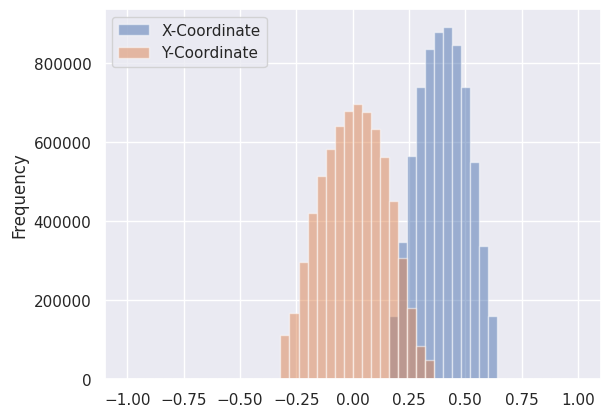

In [7]:
df = pd.read_csv("csv/states.csv", header=0, names=["X-Coordinate", "Y-Coordinate"], delimiter=" ")
print(f"Number of values: {len(df)}")
df.plot.hist(bins=50, alpha=0.5, range=[-1,1])

In [8]:
df.describe()

,X-Coordinate,Y-Coordinate
count,7.045475e+06,7.045475e+06
mean,3.997222e-01,4.655093e-03
std,1.060921e-01,1.416440e-01
min,1.890757e-01,-3.051564e-01
25%,3.176534e-01,-1.020307e-01
50%,4.000153e-01,6.424294e-03
75%,4.811430e-01,1.114249e-01
max,6.191086e-01,3.459071e-01


In [9]:
### Plot results starting here
data = [["Frozen Vision Encoder", "Action Only", 0.29475,],
        ["Frozen Vision Encoder", "Full", 0.19385],
        ["Full Finetuning", "Action Only", 0.411],
        ["Full Finetuning", "Full", -0.18608]
        ]
df = pd.DataFrame(data=data, columns=["Active Weights", "Output", "CosSim"])
df


,Active Weights,Output,CosSim
0,Frozen Vision Encoder,Action Only,0.29475
1,Frozen Vision Encoder,Full,0.19385
2,Full Finetuning,Action Only,0.41100
3,Full Finetuning,Full,-0.18608


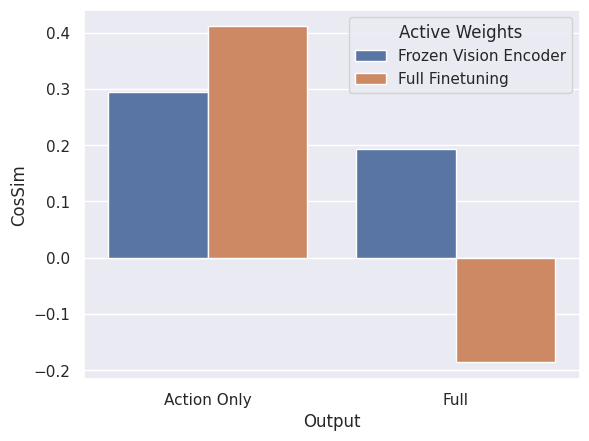

In [10]:
sns.barplot(df, x="Output", y="CosSim", hue="Active Weights")
plt.savefig("cossim_weight_configs.svg", bbox_inches="tight")
# sns.barplot(df, x="Active Weights", y="Full")

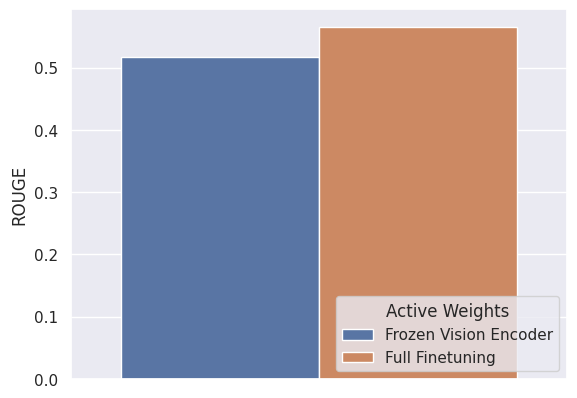

In [11]:
data = [["Frozen Vision Encoder", "Full", 0.51726],
        ["Full Finetuning", "Full", 0.56535]
        ]
df = pd.DataFrame(data=data, columns=["Active Weights", "Output", "ROUGE"])
ax = sns.barplot(df, y="ROUGE", hue="Active Weights")
sns.move_legend(ax, "lower right")
plt.savefig("rouge_weights_inclusion.svg", bbox_inches="tight")

          State    CosSim    ROUGE
0  Not Included  0.193850  0.51726
1      Included -0.046075  0.59330


/tmp/ipykernel_728/618053156.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(df, hue="State", y="CosSim", palette=colours)
/tmp/ipykernel_728/618053156.py:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(df, hue="State", y="ROUGE", palette=colours)


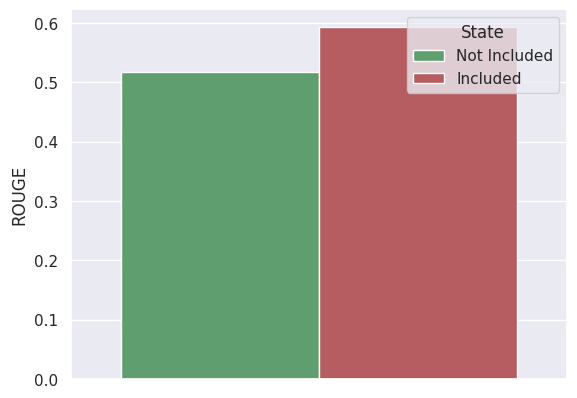

In [12]:
data = [["Not Included", 0.19385, 0.51726],
        ["Included", -0.046075, 0.5933]
        ]
df = pd.DataFrame(data=data, columns=["State", "CosSim", "ROUGE"])
print(df)
colours = np.array(sns.color_palette()[2:4])
sns.barplot(df, hue="State", y="CosSim", palette=colours)
plt.savefig("cossim_state_inclusion.svg", bbox_inches="tight")
plt.close()
sns.barplot(df, hue="State", y="ROUGE", palette=colours)
plt.savefig("rouge_state_inclusion.svg", bbox_inches="tight")

####### MSE ######
action full
0.0023$\pm$0.00
action frozen
0.0023$\pm$0.00
#############
####### CosSim ######
full full
-0.0018$\pm$0.24
full frozen
-0.0045$\pm$0.26
action full
0.0121$\pm$0.25
action frozen
-0.0070$\pm$0.26


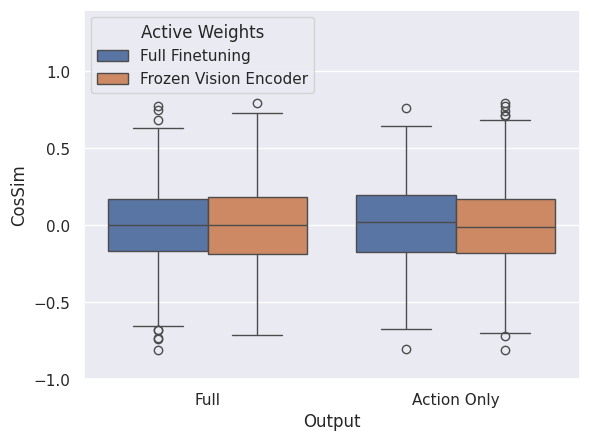

#############
####### ROUGE ######
full full
0.4437$\pm$0.04
####### ROUGE ######
full frozen
0.4463$\pm$0.04


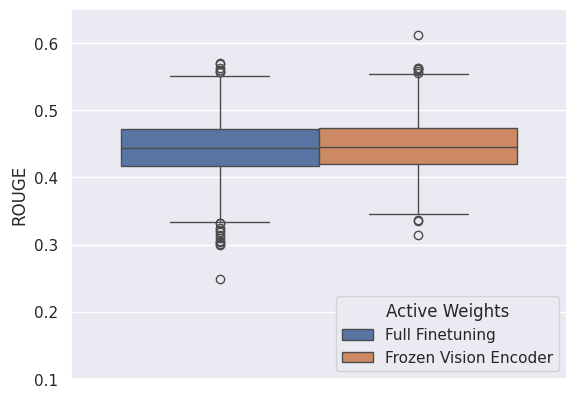

#############


In [105]:
# Weight Config Block
#### MSE
print("####### MSE ######")
action_full_mse = pd.read_csv("csv/action_full_mse.csv", names=["Step", "MSE", "_MIN", "_MAX"], delimiter=",",header=1)
action_full_mse["Output"] = "Action Only"
action_full_mse["Active Weights"] = "Full Finetuning"
print("action full")
print(f"{action_full_mse['MSE'].mean():.4f}$\\pm${action_full_mse['MSE'].std():.2f}")
action_frozen_mse = pd.read_csv("csv/action_frozen_mse.csv", names=["Step", "MSE", "_MIN", "_MAX"], delimiter=",",header=1)
action_frozen_mse["Output"] = "Action Only"
action_frozen_mse["Active Weights"] = "Frozen Vision Encoder"
print("action frozen")
print(f"{action_frozen_mse['MSE'].mean():.4f}$\\pm${action_frozen_mse['MSE'].std():.2f}")
print("#############")

print("####### CosSim ######")
full_full_cossim = pd.read_csv("csv/full_full_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
full_full_cossim["Output"] = "Full"
full_full_cossim["Active Weights"] = "Full Finetuning"
print("full full")
print(f"{full_full_cossim['CosSim'].mean():.4f}$\\pm${full_full_cossim['CosSim'].std():.2f}")

full_frozen_cossim = pd.read_csv("csv/full_frozen_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
full_frozen_cossim["Output"] = "Full"
full_frozen_cossim["Active Weights"] = "Frozen Vision Encoder"
print("full frozen")
print(f"{full_frozen_cossim['CosSim'].mean():.4f}$\\pm${full_frozen_cossim['CosSim'].std():.2f}")

action_full_cossim = pd.read_csv("csv/action_full_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
action_full_cossim["Output"] = "Action Only"
action_full_cossim["Active Weights"] = "Full Finetuning"
print("action full")
print(f"{action_full_cossim['CosSim'].mean():.4f}$\\pm${action_full_cossim['CosSim'].std():.2f}")

action_frozen_cossim = pd.read_csv("csv/action_frozen_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
action_frozen_cossim["Output"] = "Action Only"
action_frozen_cossim["Active Weights"] = "Frozen Vision Encoder"
print("action frozen")
print(f"{action_frozen_cossim['CosSim'].mean():.4f}$\\pm${action_frozen_cossim['CosSim'].std():.2f}")
df = pd.concat([full_full_cossim, full_frozen_cossim,action_frozen_cossim,action_full_cossim])
ax = sns.boxplot(df, hue="Active Weights", x="Output", y="CosSim")
ax.set(ylim=(-1, 1.4))
sns.move_legend(ax, "upper left")
plt.savefig("cossim_weight_configs.svg", bbox_inches="tight")
plt.show()
print("#############")

#### ROUGE
print("####### ROUGE ######")
full_full_ROUGE = pd.read_csv("csv/full_full_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
full_full_ROUGE["Output"] = "Full"
full_full_ROUGE["Active Weights"] = "Full Finetuning"
print("full full")
print(f"{full_full_ROUGE['ROUGE'].mean():.4f}$\\pm${full_full_ROUGE['ROUGE'].std():.2f}")
print("####### ROUGE ######")
full_frozen_ROUGE = pd.read_csv("csv/full_frozen_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
full_frozen_ROUGE["Output"] = "Full"
full_frozen_ROUGE["Active Weights"] = "Frozen Vision Encoder"
print("full frozen")
print(f"{full_frozen_ROUGE['ROUGE'].mean():.4f}$\\pm${full_frozen_ROUGE['ROUGE'].std():.2f}")
df = pd.concat([full_full_ROUGE, full_frozen_ROUGE])
ax = sns.boxplot(df, y="ROUGE", hue="Active Weights")
ax.set(ylim=(0.1, 0.65))
sns.move_legend(ax, "lower right")
plt.savefig("rouge_weight_configs.svg", bbox_inches="tight")
plt.show()
print("#############")

/tmp/ipykernel_728/3911740086.py:16: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.lineplot(data=df, x="Resolution", y="CosSim", hue="Output", style="Output", markers=True, palette=colours)


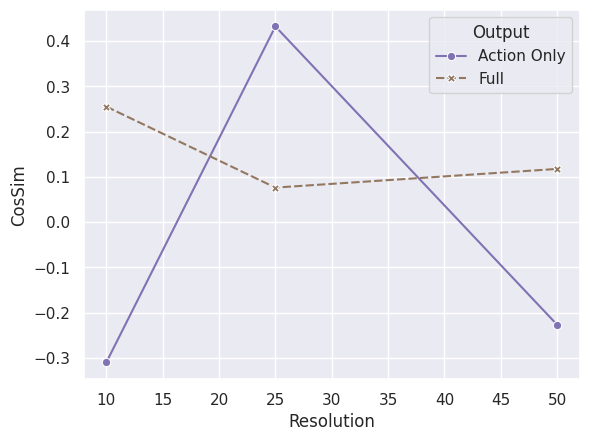

In [13]:
# Action Resolution
cols = ["Resolution", "Output", "CosSim", "MSE", "ROUGE"]
data = [[10, "Action Only", -0.31024, 0.0028664, 0.625],
        [25, "Action Only", 0.43241, 0.0015423, 0.59375],
        [50, "Action Only", -0.22708, 0.0028996, 0.59375],
        [10, "Full", 0.25523, 0.0015682, 0.57736],
        [25, "Full", 0.07623, 0.0020668, 0.58561],
        [50, "Full", 0.11752, 0.0020525, 0.57725]
        ]
df = pd.DataFrame(data=data, columns=cols)
colours = np.array(sns.color_palette()[4:6])
# sns.barplot(data=df[df["Output"]=="Full"], x="Resolution", y="ROUGE")
# plt.show()
# sns.lineplot(data=df, x="Resolution", y="MSE", hue="Output")
# plt.show()
sns.lineplot(data=df, x="Resolution", y="CosSim", hue="Output", style="Output", markers=True, palette=colours)
plt.savefig("CosSimResolution.svg", bbox_inches="tight")

In [14]:
df = pd.read_csv("csv/robovqa_stats.csv", names=["Question", "Answer", "Mode"], delimiter=" ", quotechar="|")
df.describe()

,Question,Answer,Mode
count,94997,94997,94997
unique,2742,28852,2
top,Question: current goal is: place sugar packets...,Answer: done,train
freq,2434,6732,94797


state yes
-0.0196$\pm$0.26
state no
-0.0045$\pm$0.26


/tmp/ipykernel_728/1267996525.py:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.boxplot(df, hue="State", y="CosSim", palette=colours)


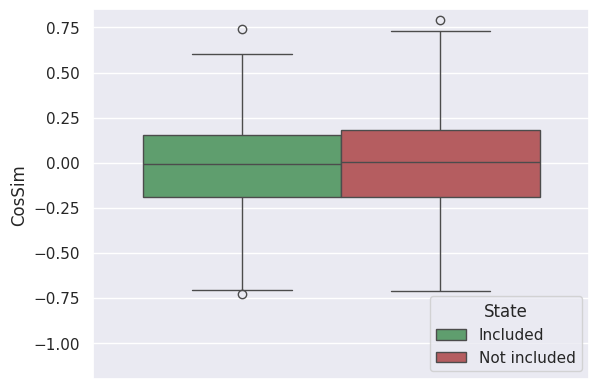

state yes
0.4596$\pm$0.04
state no
0.4463$\pm$0.04


/tmp/ipykernel_728/1267996525.py:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax=sns.boxplot(df, hue="State", y="ROUGE", palette=colours)


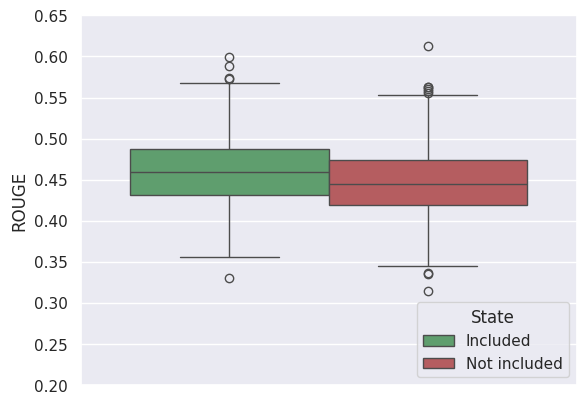

state yes
0.0024$\pm$0.00
state no
0.0024$\pm$0.00
#### BLEU
state yes
0.1495$\pm$0.04
state no
0.1360$\pm$0.04


In [103]:
### State with std
#### CosSim
state_yes_cossim = pd.read_csv("csv/state_yes_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
state_yes_cossim["State"] = "Included"
print("state yes")
print(f"{state_yes_cossim['CosSim'].mean():.4f}$\\pm${state_yes_cossim['CosSim'].std():.2f}")
state_no_cossim = pd.read_csv("csv/state_no_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
state_no_cossim["State"] = "Not included"
print("state no")
print(f"{state_no_cossim['CosSim'].mean():.4f}$\\pm${state_no_cossim['CosSim'].std():.2f}")
df = pd.concat([state_yes_cossim, state_no_cossim])
colours = np.array(sns.color_palette()[2:4])
ax = sns.boxplot(df, hue="State", y="CosSim", palette=colours)
ax.set(ylim=(-1.2, 0.85))
sns.move_legend(ax, "lower right")
plt.savefig("cossim_state_inclusion.svg", bbox_inches="tight")
plt.show()
#### ROUGE
state_yes_rouge = pd.read_csv("csv/state_yes_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
state_yes_rouge["State"] = "Included"
print("state yes")
print(f"{state_yes_rouge['ROUGE'].mean():.4f}$\\pm${state_yes_rouge['ROUGE'].std():.2f}")
state_no_rouge = pd.read_csv("csv/state_no_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
state_no_rouge["State"] = "Not included"
print("state no")
print(f"{state_no_rouge['ROUGE'].mean():.4f}$\\pm${state_no_rouge['ROUGE'].std():.2f}")
df = pd.concat([state_yes_rouge, state_no_rouge])
# print(df.describe())
colours = np.array(sns.color_palette()[2:4])
ax=sns.boxplot(df, hue="State", y="ROUGE", palette=colours)
ax.set(ylim=(0.2, 0.65))
sns.move_legend(ax, "lower right")
plt.savefig("rouge_state_inclusion.svg", bbox_inches="tight")
plt.show()
#### MSE
state_yes_mse = pd.read_csv("csv/state_yes_mse.csv", names=["Step", "MSE", "_MIN", "_MAX"], delimiter=",",header=1)
state_yes_mse["State"] = "Included"
print("state yes")
print(f"{state_yes_mse['MSE'].mean():.4f}$\\pm${state_yes_mse['MSE'].std():.2f}")
state_no_mse = pd.read_csv("csv/state_no_mse.csv", names=["Step", "MSE", "_MIN", "_MAX"], delimiter=",",header=1)
state_no_mse["State"] = "Not included"
print("state no")
print(f"{state_no_mse['MSE'].mean():.4f}$\\pm${state_no_mse['MSE'].std():.2f}")

print("#### BLEU")
state_yes_BLEU = pd.read_csv("csv/state_yes_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
state_yes_BLEU["State"] = "Included"
print("state yes")
print(f"{state_yes_BLEU['BLEU'].mean():.4f}$\\pm${state_yes_BLEU['BLEU'].std():.2f}")
state_no_BLEU = pd.read_csv("csv/state_no_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
state_no_BLEU["State"] = "Not included"
print("state no")
print(f"{state_no_BLEU['BLEU'].mean():.4f}$\\pm${state_no_BLEU['BLEU'].std():.2f}")

#### BLEU
action first yes
0.1334$\pm$0.03
action first no
0.1511$\pm$0.04
#### rouge
action first yes
0.5247$\pm$0.04
action first no
0.5087$\pm$0.04


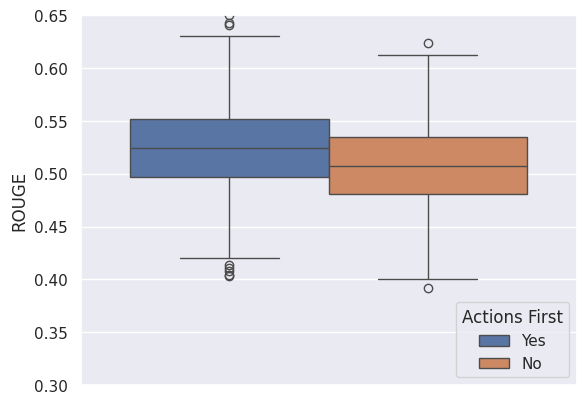

#### mse
action first yes
0.0024$\pm$0.00
action first no
0.0024$\pm$0.00
#### cossim
action first yes
0.0377$\pm$0.26
action first no
0.0106$\pm$0.25


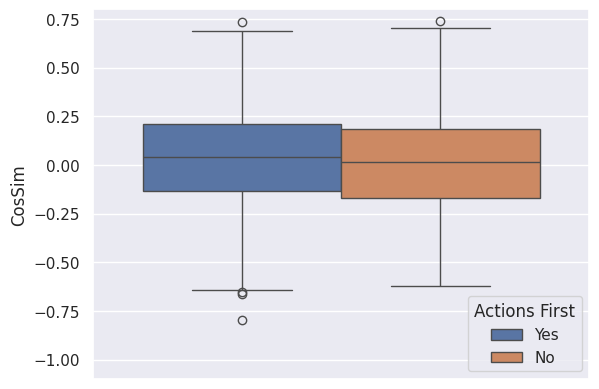

In [10]:
# Action Before Language
print("#### BLEU")
actionfirst_yes_BLEU = pd.read_csv("csv/actionfirst_yes_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_yes_BLEU["State"] = "Included"
print("action first yes")
print(f"{actionfirst_yes_BLEU['BLEU'].mean():.4f}$\\pm${actionfirst_yes_BLEU['BLEU'].std():.2f}")
actionfirst_no_BLEU = pd.read_csv("csv/actionfirst_no_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_no_BLEU["State"] = "Not included"
print("action first no")
print(f"{actionfirst_no_BLEU['BLEU'].mean():.4f}$\\pm${actionfirst_no_BLEU['BLEU'].std():.2f}")

print("#### rouge")
actionfirst_yes_rouge = pd.read_csv("csv/actionfirst_yes_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_yes_rouge["Actions First"] = "Yes"
print("action first yes")
print(f"{actionfirst_yes_rouge['ROUGE'].mean():.4f}$\\pm${actionfirst_yes_rouge['ROUGE'].std():.2f}")
actionfirst_no_rouge = pd.read_csv("csv/actionfirst_no_rouge.csv", names=["Step", "ROUGE", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_no_rouge["Actions First"] = "No"
print("action first no")
print(f"{actionfirst_no_rouge['ROUGE'].mean():.4f}$\\pm${actionfirst_no_rouge['ROUGE'].std():.2f}")
df = pd.concat([actionfirst_yes_rouge, actionfirst_no_rouge])
# print(df.describe())
ax=sns.boxplot(df, hue="Actions First", y="ROUGE")
ax.set(ylim=(0.3, 0.65))
sns.move_legend(ax, "lower right")
plt.savefig("rouge_actionfirst.svg", bbox_inches="tight")
plt.show()

print("#### mse")
actionfirst_yes_mse = pd.read_csv("csv/actionfirst_yes_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_yes_mse["State"] = "Included"
print("action first yes")
print(f"{actionfirst_yes_mse['mse'].mean():.4f}$\\pm${actionfirst_yes_mse['mse'].std():.2f}")
actionfirst_no_mse = pd.read_csv("csv/actionfirst_no_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_no_mse["State"] = "Not included"
print("action first no")
print(f"{actionfirst_no_mse['mse'].mean():.4f}$\\pm${actionfirst_no_mse['mse'].std():.2f}")

print("#### cossim")
actionfirst_yes_cossim = pd.read_csv("csv/actionfirst_yes_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_yes_cossim["Actions First"] = "Yes"
print("action first yes")
print(f"{actionfirst_yes_cossim['CosSim'].mean():.4f}$\\pm${actionfirst_yes_cossim['CosSim'].std():.2f}")
actionfirst_no_cossim = pd.read_csv("csv/actionfirst_no_cossim.csv", names=["Step", "CosSim", "_MIN", "_MAX"], delimiter=",",header=1)
actionfirst_no_cossim["Actions First"] = "No"
print("action first no")
print(f"{actionfirst_no_cossim['CosSim'].mean():.4f}$\\pm${actionfirst_no_cossim['CosSim'].std():.2f}")
df = pd.concat([actionfirst_yes_cossim, actionfirst_no_cossim])
# print(df.describe())
ax=sns.boxplot(df, hue="Actions First", y="CosSim")
sns.move_legend(ax, "lower right")
ax.set(ylim=(-1.1, 0.8))
plt.savefig("cossim_actionfirst.svg", bbox_inches="tight")
plt.show()


In [71]:
# Pretraining Influence

print("#### BLEU")
none_full_BLEU = pd.read_csv("csv/none_full_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
print("None full")
print(f"{none_full_BLEU['BLEU'].mean():.4f}$\\pm${none_full_BLEU['BLEU'].std():.2f}")
cp_full_BLEU = pd.read_csv("csv/cp_full_BLEU.csv", names=["Step", "BLEU", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp full")
print(f"{cp_full_BLEU['BLEU'].mean():.4f}$\\pm${cp_full_BLEU['BLEU'].std():.2f}")

print("#### rouge")
none_full_rouge = pd.read_csv("csv/none_full_rouge.csv", names=["Step", "rouge", "_MIN", "_MAX"], delimiter=",",header=1)
print("None full")
print(f"{none_full_rouge['rouge'].mean():.4f}$\\pm${none_full_rouge['rouge'].std():.2f}")
cp_full_rouge = pd.read_csv("csv/cp_full_rouge.csv", names=["Step", "rouge", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp full")
print(f"{cp_full_rouge['rouge'].mean():.4f}$\\pm${cp_full_rouge['rouge'].std():.2f}")

print("#### MSE")
none_action_mse = pd.read_csv("csv/none_action_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("None Action")
print(f"{none_action_mse['mse'].mean():.4f}$\\pm${none_action_mse['mse'].std():.2f}")
cp_action_mse = pd.read_csv("csv/cp_action_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp Action")
print(f"{cp_action_mse['mse'].mean():.4f}$\\pm${cp_action_mse['mse'].std():.2f}")
none_full_mse = pd.read_csv("csv/none_full_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("None full")
print(f"{none_full_mse['mse'].mean():.4f}$\\pm${none_full_mse['mse'].std():.2f}")
cp_full_mse = pd.read_csv("csv/cp_full_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp full")
print(f"{cp_full_mse['mse'].mean():.4f}$\\pm${cp_full_mse['mse'].std():.2f}")

print("#### cossim")
none_action_cossim = pd.read_csv("csv/none_action_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
print("None Action")
print(f"{none_action_cossim['cossim'].mean():.4f}$\\pm${none_action_cossim['cossim'].std():.2f}")
cp_action_cossim = pd.read_csv("csv/cp_action_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp Action")
print(f"{cp_action_cossim['cossim'].mean():.4f}$\\pm${cp_action_cossim['cossim'].std():.2f}")
none_full_cossim = pd.read_csv("csv/none_full_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
print("None full")
print(f"{none_full_cossim['cossim'].mean():.4f}$\\pm${none_full_cossim['cossim'].std():.2f}")
cp_full_cossim = pd.read_csv("csv/cp_full_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
print("cp full")
print(f"{cp_full_cossim['cossim'].mean():.4f}$\\pm${cp_full_cossim['cossim'].std():.2f}")


#### BLEU
None full
0.1511$\pm$0.04
cp full
0.1541$\pm$0.04
#### rouge
None full
0.5255$\pm$0.04
cp full
0.5309$\pm$0.04
#### MSE
None Action
0.0023$\pm$0.00
cp Action
0.0023$\pm$0.00
None full
0.0024$\pm$0.00
cp full
0.0020$\pm$0.00
#### cossim
None Action
0.0152$\pm$0.25
cp Action
0.0108$\pm$0.25
None full
0.0106$\pm$0.25
cp full
0.1601$\pm$0.24


In [78]:
# Action Granularity

print("#### BLEU")
g10_full_bleu = pd.read_csv("csv/10_full_bleu.csv", names=["Step", "bleu", "_MIN", "_MAX"], delimiter=",",header=1)
print("10 full")
print(f"{g10_full_bleu['bleu'].mean():.4f}$\\pm${g10_full_bleu['bleu'].std():.2f}")
g25_full_bleu = pd.read_csv("csv/25_full_bleu.csv", names=["Step", "bleu", "_MIN", "_MAX"], delimiter=",",header=1)
print("25 full")
print(f"{g25_full_bleu['bleu'].mean():.4f}$\\pm${g25_full_bleu['bleu'].std():.2f}")
g50_full_bleu = pd.read_csv("csv/50_full_bleu.csv", names=["Step", "bleu", "_MIN", "_MAX"], delimiter=",",header=1)
print("50 full")
print(f"{g50_full_bleu['bleu'].mean():.4f}$\\pm${g50_full_bleu['bleu'].std():.2f}")

print("")
print("#### rouge")
g10_full_rouge = pd.read_csv("csv/10_full_rouge.csv", names=["Step", "rouge", "_MIN", "_MAX"], delimiter=",",header=1)
print("10 full")
print(f"{g10_full_rouge['rouge'].mean():.4f}$\\pm${g10_full_rouge['rouge'].std():.2f}")
g25_full_rouge = pd.read_csv("csv/25_full_rouge.csv", names=["Step", "rouge", "_MIN", "_MAX"], delimiter=",",header=1)
print("25 full")
print(f"{g25_full_rouge['rouge'].mean():.4f}$\\pm${g25_full_rouge['rouge'].std():.2f}")
g50_full_rouge = pd.read_csv("csv/50_full_rouge.csv", names=["Step", "rouge", "_MIN", "_MAX"], delimiter=",",header=1)
print("50 full")
print(f"{g50_full_rouge['rouge'].mean():.4f}$\\pm${g50_full_rouge['rouge'].std():.2f}")

print("")
print("#### mse")
g10_full_mse = pd.read_csv("csv/10_full_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("10 full")
print(f"{g10_full_mse['mse'].mean():.4f}$\\pm${g10_full_mse['mse'].std():.2f}")
g25_full_mse = pd.read_csv("csv/25_full_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("25 full")
print(f"{g25_full_mse['mse'].mean():.4f}$\\pm${g25_full_mse['mse'].std():.2f}")
g50_full_mse = pd.read_csv("csv/50_full_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("50 full")
print(f"{g50_full_mse['mse'].mean():.4f}$\\pm${g50_full_mse['mse'].std():.2f}")

g10_action_mse = pd.read_csv("csv/10_action_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("10 action")
print(f"{g10_action_mse['mse'].mean():.4f}$\\pm${g10_action_mse['mse'].std():.2f}")
g25_action_mse = pd.read_csv("csv/25_action_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("25 action")
print(f"{g25_action_mse['mse'].mean():.4f}$\\pm${g25_action_mse['mse'].std():.2f}")
g50_action_mse = pd.read_csv("csv/50_action_mse.csv", names=["Step", "mse", "_MIN", "_MAX"], delimiter=",",header=1)
print("50 action")
print(f"{g50_action_mse['mse'].mean():.4f}$\\pm${g50_action_mse['mse'].std():.2f}")

print("")
print("#### cossim")
g10_full_cossim = pd.read_csv("csv/10_full_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g10_full_cossim["Resolution"] = 10
g10_full_cossim["Output"] = "Full"
print("10 full")
print(f"{g10_full_cossim['cossim'].mean():.4f}$\\pm${g10_full_cossim['cossim'].std():.2f}")
g25_full_cossim = pd.read_csv("csv/25_full_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g25_full_cossim["Resolution"] = 25
g25_full_cossim["Output"] = "Full"
print("25 full")
print(f"{g25_full_cossim['cossim'].mean():.4f}$\\pm${g25_full_cossim['cossim'].std():.2f}")
g50_full_cossim = pd.read_csv("csv/50_full_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g50_full_cossim["Resolution"] = 50
g50_full_cossim["Output"] = "Full"
print("50 full")
print(f"{g50_full_cossim['cossim'].mean():.4f}$\\pm${g50_full_cossim['cossim'].std():.2f}")

g10_action_cossim = pd.read_csv("csv/10_action_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g10_action_cossim["Resolution"] = 10
g10_action_cossim["Output"] = "Action Only"
print("10 action")
print(f"{g10_action_cossim['cossim'].mean():.4f}$\\pm${g10_action_cossim['cossim'].std():.2f}")
g25_action_cossim = pd.read_csv("csv/25_action_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g25_action_cossim["Resolution"] = 25
g25_action_cossim["Output"] = "Action Only"
print("25 action")
print(f"{g25_action_cossim['cossim'].mean():.4f}$\\pm${g25_action_cossim['cossim'].std():.2f}")
g50_action_cossim = pd.read_csv("csv/50_action_cossim.csv", names=["Step", "cossim", "_MIN", "_MAX"], delimiter=",",header=1)
g50_action_cossim["Resolution"] = 50
g50_action_cossim["Output"] = "Action Only"
print("50 action")
print(f"{g50_action_cossim['cossim'].mean():.4f}$\\pm${g50_action_cossim['cossim'].std():.2f}")

#### BLEU
10 full
0.1696$\pm$0.04
25 full
0.1560$\pm$0.04
50 full
0.1511$\pm$0.04

#### rouge
10 full
0.5471$\pm$0.04
25 full
0.5338$\pm$0.04
50 full
0.5255$\pm$0.04

#### mse
10 full
0.0021$\pm$0.00
25 full
0.0022$\pm$0.00
50 full
0.0024$\pm$0.00
10 action
0.0024$\pm$0.00
25 action
0.0023$\pm$0.00
50 action
0.0023$\pm$0.00

#### cossim
10 full
0.1454$\pm$0.26
25 full
0.0965$\pm$0.26
50 full
0.0106$\pm$0.25
10 action
0.0060$\pm$0.27
25 action
-0.0113$\pm$0.25
50 action
0.0152$\pm$0.25


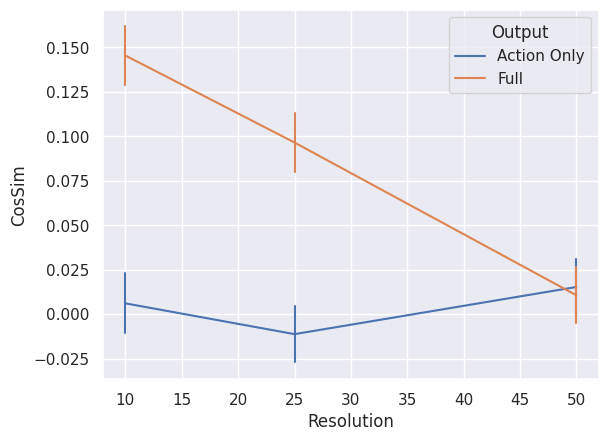

In [104]:
df = pd.concat([g10_action_cossim,
                g10_full_cossim,
                g25_action_cossim,
                g25_full_cossim,
                g50_action_cossim,
                g50_full_cossim])
df = df.rename(columns={"cossim": "CosSim"})

sns.lineplot(
    data=df, x="Resolution", y="CosSim", hue="Output", err_style="bars", errorbar=("se", 2),
)

plt.savefig("CosSimResolution.svg", bbox_inches="tight")